In [0]:
# datasets for spotify
april2019 = "https://raw.githubusercontent.com/EvidenceN/data-science-1/evidence/SpotifyAudioFeaturesApril2019.csv"

nov2018 = "https://raw.githubusercontent.com/EvidenceN/data-science-1/evidence/SpotifyAudioFeaturesNov2018.csv"

In [0]:
import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
#%matplotlib inline

In [0]:
april = pd.read_csv(april2019)
nov = pd.read_csv(nov2018)

In [4]:
april.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [0]:
#nov.head()

In [6]:
april.shape

(130663, 17)

In [0]:
#nov.shape

In [0]:
# april dataset is similar to november dataset, so i will just use april dataset. 

In [0]:
#profile = ProfileReport(april)

In [0]:
#profile

In [0]:
#a = sns.pairplot(april)

In [0]:
# b = sns.PairGrid(april)

In [0]:
#px.scatter(april, x="popularity", y="tempo")

In [0]:
first = april.sample(n=10, random_state=1)

In [15]:
first.head(5)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
117119,Pyotr Ilyich Tchaikovsky,0PuPq023ThmKPBFenCrlWr,"The Queen of Spades, Op. 68, Act II Scene 4: N...",0.951000,0.235,294920,0.0795,0.000379,2,0.0913,-20.613,1,0.0509,81.000,3,0.0632,4
35909,Big Marvel,77Gt911ED7lm0dmzfyCL2U,Call Me Boss,0.048500,0.785,161310,0.9150,0.524000,10,0.1480,-1.841,0,0.0784,124.014,4,0.6030,31
22641,Nalim,1m27YCJvtNYomXi2v5ZXWS,Dust Flare,0.754000,0.500,190324,0.2640,0.029500,0,0.4530,-13.351,1,0.0697,169.945,4,0.4110,1
90195,Zen Music Garden,3MjFr2EWw57q19rgow7SYU,Rain Sound: Meditation,0.000028,0.231,151567,0.7890,0.960000,10,0.3680,-28.197,0,0.0437,88.178,3,0.0342,0
105734,Jesus Culture,1i0k7eMdgsA5AQZeQSb4Uw,Defender - Live,0.013600,0.234,738347,0.5080,0.000002,6,0.5450,-6.985,1,0.0361,139.902,4,0.0746,48


In [0]:
#sns.pairplot(first, kind="reg")

In [0]:
second100 = april.sample(n=100, random_state=1)

In [0]:
#sns.pairplot(second100, kind="reg")

In [0]:
third200 = april.sample(n=200, random_state=1)

In [0]:
#sns.pairplot(third200, kind="reg")

In [0]:
#help(cf)

In [0]:
#april.dtypes

**Eneryg**
energetic tracks feel fast, loud, and noisy.Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

*Look at relationship between "energy" and "loudness, "*

In [0]:
# less popular songs

#popularity_1 = april[april['popularity'] <=20]

In [0]:
#popularity_1.head()

In [0]:
#popularity_1.shape

In [0]:
#pop_sample = popularity_1.sample(n=10, random_state=1)

In [0]:
#pop_sample

In [0]:
#sns.pairplot(pop_sample, kind="reg")

In [0]:
# what makes this songs unpopular

# bar graphs

In [0]:
# px.bar(april, x="track_name", y="popularity" )

In [0]:
#fig = px.bar(pop_sample)
#fig.show()

In [0]:
#sns.barplot(x=april['acousticness'], y=april['popularity'])

In [0]:
#sns.barplot(x=pop_sample['acousticness'], y=pop_sample['popularity'])

In [0]:
#sns.barplot(x=first['loudness'], y=first['popularity'])

In [0]:
#sns.barplot(x=first['loudness'], y=first['energy'])

In [0]:
# what to group song by
# group by popularity or other feature or user defined
# function that allows us users to select important features and depending on the features they 
# select, create visualization to help them understand how those features made us choose the song

# shows relationship between the features and song
# the feature they choose vs another feature. 

# Function to output different graphs based on what the user choose


In [37]:
second100.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
117119,Pyotr Ilyich Tchaikovsky,0PuPq023ThmKPBFenCrlWr,"The Queen of Spades, Op. 68, Act II Scene 4: N...",0.951000,0.235,294920,0.0795,0.000379,2,0.0913,-20.613,1,0.0509,81.000,3,0.0632,4
35909,Big Marvel,77Gt911ED7lm0dmzfyCL2U,Call Me Boss,0.048500,0.785,161310,0.9150,0.524000,10,0.1480,-1.841,0,0.0784,124.014,4,0.6030,31
22641,Nalim,1m27YCJvtNYomXi2v5ZXWS,Dust Flare,0.754000,0.500,190324,0.2640,0.029500,0,0.4530,-13.351,1,0.0697,169.945,4,0.4110,1
90195,Zen Music Garden,3MjFr2EWw57q19rgow7SYU,Rain Sound: Meditation,0.000028,0.231,151567,0.7890,0.960000,10,0.3680,-28.197,0,0.0437,88.178,3,0.0342,0
105734,Jesus Culture,1i0k7eMdgsA5AQZeQSb4Uw,Defender - Live,0.013600,0.234,738347,0.5080,0.000002,6,0.5450,-6.985,1,0.0361,139.902,4,0.0746,48


In [38]:
px.scatter(second100, x='loudness', y='energy', trendline='ols')

In [0]:
features = second100.columns.to_list()[3:]

In [40]:
features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'popularity']

In [0]:

df = second100

In [0]:
#dummy_feature = "acousticness"

# initial function using 100 samples

def viz(user_feature = "energy"):
  """User feature = the feature user selects as important to them"""

  import plotly.express as px

  df = second100 #dataframe/database data will be pulled from

  features = second100.columns.to_list()[3:] #removing non-numeric features

  #list comprehension to create a graph using all columns
  g = [px.scatter(df, 
                x=user_feature, 
                y=feature, 
                trendline='ols', 
                title=f'Relationship between {user_feature} and {feature}')for 
     feature in features]

  #pulling out the information in the graphs from the list comprehension

  acoustic = g[0]
  dance = g[1]
  duration = g[2]
  energy = g[3]
  instrument = g[4]
  key = g[5]
  liveness = g[6]
  loudness = g[7]
  mode = g[8]
  speech = g[9]
  temp = g[10]
  time_sig = g[11]
  valence = g[12]
  popularity = g[13]

  return loudness

In [43]:
viz()

In [0]:
user_feature = "acousticness"
a = [px.scatter(df, 
                x=user_feature, 
                y=feature, 
                trendline='ols', 
                title=f'Relationship between {user_feature} and {feature}')for 
     feature in features]

In [45]:
a[1]

In [46]:
second100.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
117119,Pyotr Ilyich Tchaikovsky,0PuPq023ThmKPBFenCrlWr,"The Queen of Spades, Op. 68, Act II Scene 4: N...",0.951000,0.235,294920,0.0795,0.000379,2,0.0913,-20.613,1,0.0509,81.000,3,0.0632,4
35909,Big Marvel,77Gt911ED7lm0dmzfyCL2U,Call Me Boss,0.048500,0.785,161310,0.9150,0.524000,10,0.1480,-1.841,0,0.0784,124.014,4,0.6030,31
22641,Nalim,1m27YCJvtNYomXi2v5ZXWS,Dust Flare,0.754000,0.500,190324,0.2640,0.029500,0,0.4530,-13.351,1,0.0697,169.945,4,0.4110,1
90195,Zen Music Garden,3MjFr2EWw57q19rgow7SYU,Rain Sound: Meditation,0.000028,0.231,151567,0.7890,0.960000,10,0.3680,-28.197,0,0.0437,88.178,3,0.0342,0
105734,Jesus Culture,1i0k7eMdgsA5AQZeQSb4Uw,Defender - Live,0.013600,0.234,738347,0.5080,0.000002,6,0.5450,-6.985,1,0.0361,139.902,4,0.0746,48


In [0]:
# how the features of one song compares to the feature of another

test = second100.sample(n=1, random_state=1)

In [48]:
test

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
6616,Turnstile,3FccT79TCAS5AnYFg4nQUQ,Can't Get Away,0.000426,0.243,182027,0.927,0.478,9,0.647,-4.107,1,0.0644,91.502,4,0.246,43


In [0]:
song = test.drop(labels=['track_id', "track_name", "artist_name"], axis=1)

In [50]:
song

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
6616,0.000426,0.243,182027,0.927,0.478,9,0.647,-4.107,1,0.0644,91.502,4,0.246,43


In [0]:
acoustic = song["acousticness"]
dance = song["danceability"]
energy = song["energy"]
live = song["liveness"]
speech = song["speechiness"]

In [0]:
song_selection = pd.DataFrame({
    "acoustic": acoustic,
    "dance": dance,
    "energy": energy,
    "live": live,
    "speech": speech
})

In [53]:
song_selection

,acoustic,dance,energy,live,speech
6616,0.000426,0.243,0.927,0.647,0.0644


In [69]:
px.histogram(song_selection)


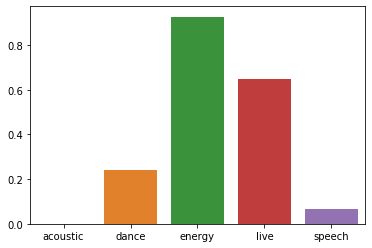

In [76]:
sns.barplot(data=song_selection);

In [0]:
x = song_selection.columns.to_list()

In [80]:
x

['acoustic', 'dance', 'energy', 'live', 'speech']

In [83]:
x[0]

'acoustic'

In [0]:
ab  = px.bar(data_frame=song_selection, x=x)
ab.show()

In [77]:


import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()



In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

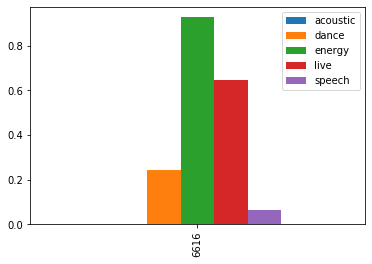

In [68]:
song_selection.plot.bar()